-**Clustering** is a machine learning technique that uses unsupervised learning
- Group unlabelled data into natural clusters
- Clustering is an optimisation problem
- $variability(c) = \sum_{e \in c}distance(mean(c),e)^2$
- Variance is different from variability, you don't divide by n. This is because in clustering big and bad is worse than small and bad
- $dissimilarity(C) = \sum_{c in C}variability(c)$
- Find a C that minimises the dissimilarity
- In order not to end up as each point being a clutser we add a constraint e.g. the clusters have to have some minimum distance between them or we can constrain the number of clusters

**Hierarchical clustering**
- Start by assigning each item to a cluster so that if you have N items you have N clusters, each containing just one item
- Find the closest (most similar) pair of clusters and merge then into a single cluster, so that now you have one fewer clusters
- Continue until all items are clustered into a single cluster of size N
- Agglomerative hierarchical clustering
- What do we mean by closest?
- **Single Linkage**: consider the distance between one cluster and another cluster to be equal to the shortest distance from any member of one cluster to any member of the other cluster
- **Complete Linkage**: consider the distance between one cluster and another to be equal to the greatest distance from any member of one cluster to any member of the other cluster
- **Average Linkage**: consider the distance between one cluster and another cluster to be the average distance from any member of one cluster to any member of the other cluster

|BOS|NY|CHI|DEN|SF|SEA|
|--|--|--|--|--|--
|0|206|963|1949|3095|2979|
|0|0|802|1771|2934|2815|
|0|0|0|966|1235|1307|
|0|0|0|0|1235|1307|
|0|0|0|0|0|808|
  

**Clusters**
- [BOS, NY] [CHI [DEN] [SF] [SEA]
- [BOS, NY, CHI] [DEN] [SF] [SEA]
- [BOS, NY, CHI] [DEN] [SF, SEA]
- **Single**: [BOS, NY, CHI, DEN] [SF, SEA]
- **Complete**: [BOS, NY, CHI] [DEN, SF, SEA]

**Pros and cons of hierarchical clustering**
- Get a history of dendrograms
- Deterministic given a linkage metric
- Answer might not be optimial. Greedy algorithm. Making locally optimal decisions at each point may or may not give us a globally optimal solution
- Flexible
- Really slow, complexity $O(n^3)$. Not something you want to work with on large data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


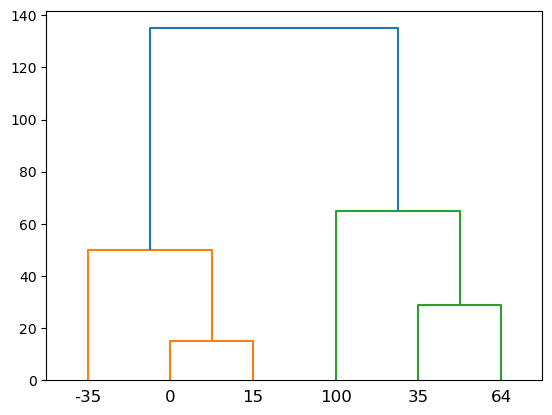

In [32]:
data = [0, 15, 35, 64, 100, -35]
z = np.reshape(data, (len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(z, method='complete'), labels=data)

In [5]:
z

array([[ 0],
       [ 4],
       [ 6],
       [30],
       [39],
       [52],
       [56],
       [58]])

In [23]:
airports = ['BOS', 'NY', 'CHI', 'DEN', 'SF', 'SEA']
distance = [[0, 206, 963, 1949, 3095, 2979],
            [206, 0, 802, 1771, 2934, 2815],
            [963, 802, 0, 966, 2142, 2013],
            [1949, 1771, 966, 0, 1235, 1307],
            [3095, 2934, 2142, 1235, 0, 808],
            [2979, 2815, 2013, 1307, 808, 0]]

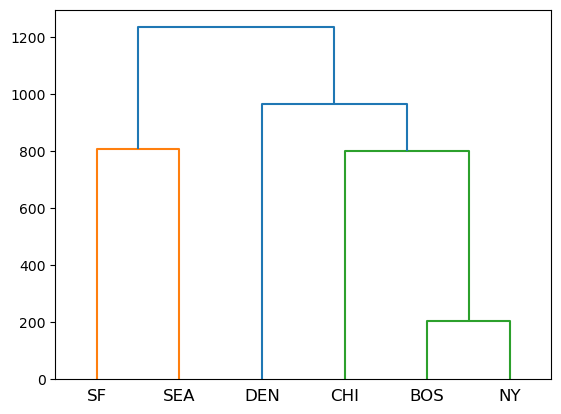

In [29]:
from scipy.spatial.distance import squareform
condensed_dist_matrix = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method='single'), labels=airports)

**k-means clustering**
- k is the number of clusters we want
- If you don't have any idea about how many clusters there are this is problematic
- If you know how many clusters you want, it is a good choice as it much faster

**k-means algorithm**
- Randomly choose k samples as initial centroids
- while True:
- create k clusters by assigning each point to the nearest cluster
- compute k new centroids by averaging the points in each cluster
- if centroids don't change
- exit

- Complexity of one iteration
- Compare each point with each centoid - k*n
- Typically it converges quite quickly
- Most commonly used clustering algorithm as it is very fast

**Choosing k**
- Choosing the wrong k can be problematic
- If k non-sensical then your clustering will be non-sensical
- How do we choose k?
- Results can depend on the initial centroids
- k-means is non-deterministic
- If the initial centroids are poorly chosen it can take longer to converge or you can get a completely different answer

**Choosing k**
- Choose k using a priori knowledge of the application
- For example there 5 different types of bacteria
- There are two types of people in the world - DkIT graduates and not
- Try different values of k and evaluate the quality of the results
- Run hierarchical clustering on a subset of the data
- Try and select good initial centroids distributed over the space
- Try multiple sets of randomly selected centroids and select the best result

**Mitigating dependence on the initial centroids**
- best = kmeans(points)
- for t in range(numTrials):
- C = kmeans(points)
- if dissimarlity(C) < dissimilarity(best)
- best = C
- return best

- Think of a centroid as the "centre of gravity" of a cluster

**Elbow method to find k**
- $SSE_1 = \sum_{i=0}^ndist(x_i - c_1)^2$
- $SSE = SSE_1 + \dots + SSE_k$